# Zeds - Bringing Our Models Back From The Dead
### Justin Butler
#### November 16, 2017

## Basic Zombie Model
Now we propose a differential equations model for an outbreak of zombies. We keep track of normal humans, susceptible to becoming zombies $S(t)$, the zombie population $Z(t)$, and the "removed" population (corpses), $R(t)$.
The behavior of these interacting population is defined by the system of differential equations:
\begin{equation} \dfrac{dS}{dt} = \pi S - \beta SZ - \delta S \qquad (1)\end{equation}

$$ \dfrac{dZ}{dt} = \beta SZ + \zeta R -  \alpha SZ\qquad (2)$$

$$ \dfrac{dR}{dt} = \delta S +  \alpha SZ - \zeta R \qquad (3)$$

Equation (1) represents the change in the human population with time; $\pi S$ is the birth of new humans, and $\delta S$ is the natural death of the humans.  The term $\beta SZ$ represents a human-zombie interaction in which a human is infected with zombiism.

Equation (2) represents the change in the zombie population with time; we see an increase due to humans becoming zombies ($\beta SZ)$, increase from Voodoo sorcerers enchanting corpses to rise as zombies $\zeta R$, and death of zombies due to interactions with humans $-\alpha SZ$.

Equation (3) represents the change in the corpses with time; we see an increase in corpses due to natural human death ($\delta S$) and humans killing zombies ($\alpha SZ$), and a decrease due to corpses rising as zombies ($-\zeta R$).

To begin let $\alpha = 0.005$, $\beta = 0.0095$, $\zeta = 0.0001$ and $\delta = 0.0001$, and $\pi = 0$.  Start with 500 (units of) humans, no zombies and no corpses, and one evil Voodoo spell that makes zombies rise from the dead.  What happens?


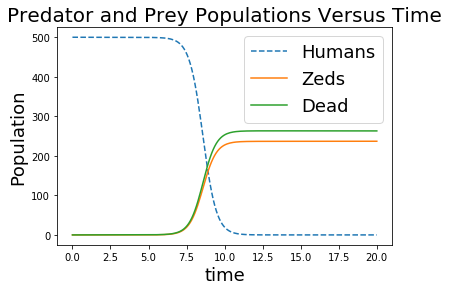

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Zombie-Volterra differential equation
def ZombVolt(xx,t,a,b,d,z,p):
    hum = xx[0]
    zom = xx[1]
    dea = xx[2]
    humP = p*hum - b*hum*zom - d*hum
    zomP = b*hum*zom - a*hum*zom + z*dea
    deaP = a*hum*zom + d*hum - z*dea
    return np.array([humP, zomP, deaP])

a = 0.005
b = 0.0095
d = 0.0001
z = 0.0001
p = 0

trange = np.linspace(0,20,200)
xsoln = odeint(ZombVolt, [500,0,0], trange, (a,b,d,z,p))
fig=plt.figure()
plt.plot(trange, xsoln[:,0],  linestyle='--', label="Humans")
plt.plot(trange, xsoln[:,1], label="Zeds")
plt.plot(trange, xsoln[:,2], label="Dead")
plt.title("Predator and Prey Populations Versus Time", fontsize='20')
plt.ylabel("Population", fontsize='18')
plt.legend(fontsize='18')
plt.xlabel("time", fontsize='18')
plt.show()
plt.close()

#### Results Discussion
These results are terrifying.

With the parameters and equations we set up in the previous step, the human population will always drop to zero over time. Humanity will be forgotten and a new age of undead will rise up in its place.

#### Possible new model
Personally, I'd like to believe that not all humans will die out given a zombie apocolypse. I think the majority should die, but not necessarily all of them. There should be a point where there are so few humans that the zombies can't necessarily get to all of them - and then they start to rebuild and slowly kill off all of the zombies. ALso, I'd like to get rid of the sorcerer interpretation. Although necromancy is an excellent school of magic, I'm going to assume that magic doesn't exist in the world I am modeling. As such, let's look at some different differentials:

\begin{align}
\frac{dS}{dt} &= \pi S - \beta (S-\sigma) Z - \delta S \qquad (4)\\
\frac{dZ}{dt} &= \beta (S-\sigma) Z - \left[ \alpha\cdot\left(1-\frac{1}{t}\right)\right ]S Z \qquad (5)\\
\frac{dR}{dt} &= \delta S + \left[ \alpha\cdot\left(1-\frac{1}{t}\right)\right ]S Z
\end{align}

With this model, if there is a extremely small number of humans (less than $\sigma$ then they should be able to escape the notice of the zombies. Also, as time progresses, although the chance of someone getting infected from a zombie encounter might stay the same, the humans will develop better techniques for mass slaughtering zombies. This means that at the start of the outbreak, humans will be unskilled at fighting zombies. However, as time progresses they will become better at living in the crazy world they've been thrust into.

For the following model, we will start with a human population of 500, a zombie population of 1, no one dead, and the following parameter values:

$\alpha = 0.005$,
$\pi = 0.001$,
$\sigma = 50$,
$\delta = 0.0001$, and
$\beta = 0.0095$

For the sake of not dividing by zero in the zombie equation, the start time will be moved forward to $t=1$ rather than $t=0$.

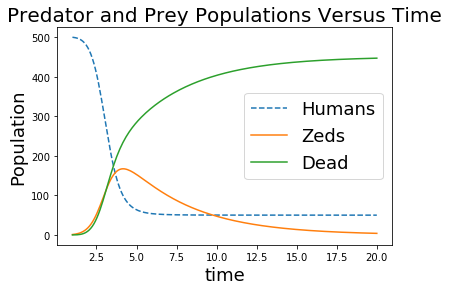

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Zombie-Volterra differential equation
def JustZombVolt(xx,t,b,d,s,p):
    hum = xx[0]
    zom = xx[1]
    dea = xx[2]
    humP = p*hum - b*(hum-s)*zom - d*hum
    zomP = b*(hum-s)*zom - (a*(1-(1/t**2)))*hum*zom
    deaP = d*hum + (a*(1-(1/t**2)))*hum*zom
    return np.array([humP, zomP, deaP])

a = 0.005
b = 0.0095
d = 0.0001
s = 50
p = 0

trange = np.linspace(1,20,200)
xsoln = odeint(JustZombVolt, [500,1,0], trange, (b,d,s,p))
fig=plt.figure()
plt.plot(trange, xsoln[:,0],  linestyle='--', label="Humans")
plt.plot(trange, xsoln[:,1], label="Zeds")
plt.plot(trange, xsoln[:,2], label="Dead")
plt.title("Predator and Prey Populations Versus Time", fontsize='20')
plt.ylabel("Population", fontsize='18')
plt.legend(fontsize='18')
plt.xlabel("time", fontsize='18')
plt.show()
plt.close()

#### Discussion/Summary
The model worked exactly how I wanted it to. The population was hit hard by the zombie onslaught right at the beginning, but even though there were only a few humans left, they were able to start fighting back more effectively and take back the planet. There is one glaring issue with this particular model. Just because there are few humans doesn't mean that there won't be any zombie bites at all. Bites will still happen, the ratio should just become smaller over time.

A possible rectification of this issue would be to make the parameter $\beta$ more variable like how the parameter $\alpha$ was altered. That way, the concept that (over time) humans become more careful around zombies, can be more accurately modeled.

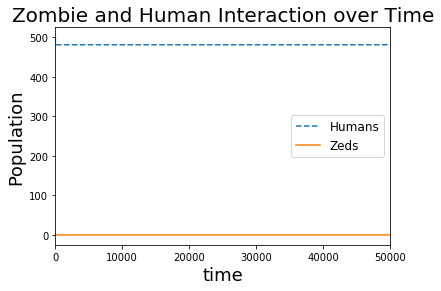

480.999999992
480.999999993
480.999999993
480.999999992
480.999999992
480.999999992
480.999999992
480.999999992
480.999999992
480.999999993
480.999999993
480.999999994
480.999999995
480.999999996
480.999999996
480.999999996
480.999999996
480.999999997
480.999999997
480.999999997
480.999999997
480.999999998
480.999999998
480.999999998
480.999999998
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.999999999
480.99

-3.46936800871e-10
-3.50779913016e-10
-3.54456051219e-10
-3.5796521548e-10
-3.61307405799e-10
-3.64482622175e-10
-3.67490864609e-10
-3.70332133101e-10
-3.7300642765e-10
-3.75513748258e-10
-3.77854094923e-10
-3.80027467645e-10
-3.82033866426e-10
-3.83873291264e-10
-3.8554574216e-10
-3.87051219114e-10
-3.88389722125e-10
-3.89561251194e-10
-3.90565806321e-10
-3.91403387506e-10
-3.92073994748e-10
-3.92577628048e-10
-3.92914287406e-10
-3.93083972821e-10
-3.93086684295e-10
-3.92922421825e-10
-3.92591185414e-10
-3.92092975061e-10
-3.91427790765e-10
-3.90595632527e-10
-3.89596500346e-10
-3.88430394224e-10
-3.87097314159e-10
-3.85597260152e-10
-3.83930232202e-10
-3.82096230311e-10
-3.80095254477e-10
-3.779273047e-10
-3.75592380982e-10
-3.73090483321e-10
-3.70421611718e-10
-3.67585766173e-10
-3.64582946685e-10
-3.61413153255e-10
-3.58076385883e-10
-3.54572644569e-10
-3.50901929312e-10
-3.47064240113e-10
-3.43059576972e-10
-3.38887939889e-10
-3.34549328863e-10
-3.30043743895e-10
-3.25371184985e-1

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Zombie differential equation with humans being better fighters
def ZombLose(xx,t,a,b,d,p):
    hum = xx[0]
    zom = xx[1]
    dea = xx[2]
    humP = p*hum - b*hum*zom - d*hum
    zomP = b*hum*zom - a*hum*zom
    deaP = a*hum*zom + d*hum
    return np.array([humP, zomP, deaP])

a1 = 0.01
b1 = 0.0095
d1 = 0.0001
p1 = 0.0001

trange1 = np.linspace(0,50000,50000)

xsoln1 = odeint(ZombLose, [500,1,0], trange1, (a1,b1,d1,p1))
fig=plt.figure()
plt.plot(trange1, xsoln1[:,0],  linestyle='--', label="Humans")
plt.plot(trange1, xsoln1[:,1], label="Zeds")
#plt.plot(trange, xsoln[:,2], label="Dead")
plt.title("Zombie and Human Interaction over Time", fontsize='20')
plt.ylabel("Population", fontsize='18')
plt.legend(fontsize='12')
plt.xlabel("time", fontsize='18')
plt.xlim(0,50000)
plt.show()
plt.close()

a2 = 0.00951
b2 = 0.0095
d2 = 0.0001
p2 = 0.0001

#trange2 = np.linspace(0,50000,50000)

#xsoln2 = odeint(ZombLose, [5000,1,0], trange2, (a2,b2,d2,p2))
#fig=plt.figure()
#plt.plot(trange2, xsoln2[:,0],  linestyle='--', label="Humans")
#plt.plot(trange2, xsoln2[:,1], label="Zeds")
#plt.plot(trange, xsoln[:,2], label="Dead")
#plt.title("Zombie and Human Interaction over Time", fontsize='20')
#plt.ylabel("Population", fontsize='18')
#plt.legend(fontsize='12')
#plt.xlabel("time", fontsize='18')
#plt.xlim(0,20)
#plt.show()
#plt.close()

for i in range(100,1000):
    print xsoln1[i,0]
for i in range(100,1000):
    print xsoln2[i,1]